In [14]:
import sumolib
import networkx as nx
import matplotlib.pyplot as plt

First let's read in the graph file and see if it works properly

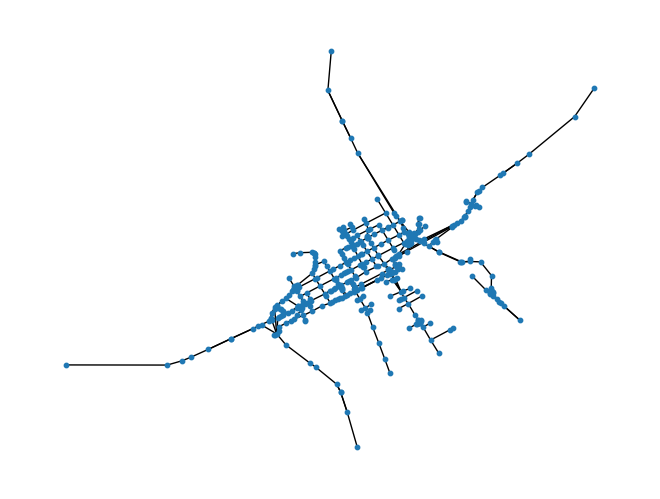

In [20]:
gyor_net = sumolib.net.readNet('s_gyor.net.xml')
def read_sumo_net(filename):
    net = sumolib.net.readNet(filename)
    G = nx.Graph()
    
    # Add nodes
    for node in net.getNodes():
        G.add_node(node.getID(), pos=(node.getCoord()))
    # Add edges
    for edge in net.getEdges():
        for lane in edge.getLanes():
            edge_id = lane.getEdge().getID()
            starting_node_id = net.getEdge(edge_id).getFromNode().getID()
            ending_node_id = net.getEdge(edge_id).getToNode().getID()
            G.add_edge(starting_node_id, ending_node_id)
    return G

def plot_graph(G):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=False, node_size=10)
    plt.show()
Graph = read_sumo_net('s_gyor.net.xml')
plot_graph(Graph)